<h1>Wstęp</h1>

In [1]:
%load_ext autoreload
%autoreload 2

In [42]:
# Importowanie potrzebnych bibliotek
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Uczenie maszynowe, czyli właście co?

## Co to jest?

Uczenie maszynowe (ang. Machine Learning) to dziedzina informatyki i sztucznej inteligencji, która pozwala komputerom uczyć się z danych, aby automatycznie ulepszać swoje działania. Główna idea polega na tym, że zamiast tworzyć sztywne reguły, które określają, jak komputer powinien rozwiązywać zadania, możemy dać mu dane i pozwolić, by sam odkrył wzorce oraz reguły, na podstawie których będzie podejmował decyzje.

<img src="img/AI_ML_DS.png" width="600">

**Przykład**

Weźmy prosty przykład, aby zilustrować, jak działa uczenie maszynowe. Załóżmy, że chcemy, aby komputer rozpoznawał, czy na zdjęciu jest kot, czy nie. Tradycyjne podejście wymagałoby zaprogramowania wielu reguł – jak „koty mają ogony”, „koty mają uszy” itp. Problem w tym, że świat jest zbyt skomplikowany, aby stworzyć tak szczegółowe reguły. Dlatego w uczeniu maszynowym podajemy komputerowi wiele zdjęć kotów oraz zdjęć innych obiektów, a on sam uczy się, jakie cechy pozwalają odróżnić kota od reszty.

**Metafora**

Można powiedzieć, że programowanie tradycyjne jest jak budowanie zegara – każda część działa precyzyjnie według naszej konstrukcji. Uczenie maszynowe natomiast przypomina naukę jazdy na rowerze – uczymy się na podstawie prób i błędów, a z czasem stajemy się w tym coraz lepsi.

<img src="img/trenowanie_modelu_schemat.png" width="800">

## Rodzaje uczenia maszynowego

![Machine learning taxonomy](https://media.licdn.com/dms/image/v2/C4D12AQH6M4UqfFDheA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1621975269895?e=1733961600&v=beta&t=nfMdZrVf-wTldSmX9s2cLa7YugrT9go4NOEUnPsygpw
"Machine learning taxonomy")

Uczenie maszynowe dzielimy na różne typy, zależnie od tego, jakiego rodzaju zadanie chcemy rozwiązać i jakie dane mamy dostępne. Można rozróżnić trzy podstawowe typy: uczenie nadzorowane, uczenie nienadzorowane oraz uczenie ze wzmocnieniem.

---

**Uczenie nadzorowane (Supervised Learning)**

W uczeniu nadzorowanym algorytm uczy się na podstawie zbioru danych, który zawiera zarówno dane wejściowe, jak i poprawne odpowiedzi (tzw. etykiety). W skrócie, uczymy model, pokazując mu przykłady i odpowiedzi do nich.

Jeśli chcemy stworzyć model przewidujący ceny mieszkań, dajemy mu informacje o mieszkaniach (np. liczba pokoi, powierzchnia, lokalizacja) oraz znane ceny, aby mógł odkryć, które cechy mają wpływ na cenę. Dzięki temu, gdy damy mu nowe dane, będzie w stanie przewidzieć cenę.

---

**Uczenie nienadzorowane (Unsupervised Learning)**


W uczeniu nienadzorowanym model nie otrzymuje odpowiedzi (etykiet). Zamiast tego dostaje tylko surowe dane i musi samodzielnie szukać wzorców.

Przykładem może być segmentacja klientów – mamy dane o zakupach klientów, ale nie wiemy, jakie grupy ich dzielą. Model może jednak wykryć, że niektórzy klienci mają podobne zachowania zakupowe i podzielić ich na grupy, np. "osoby kupujące regularnie elektronikę" czy "osoby robiące zakupy sezonowe".
Typowe zastosowania uczenia nienadzorowanego to analiza skupień (clustering), redukcja wymiarowości (do wizualizacji), kompresja danych.

---

**Uczenie ze wzmocnieniem (Reinforcement Learning)**

W uczeniu ze wzmocnieniem model uczy się poprzez interakcję z otoczeniem i nagrody, które otrzymuje za swoje działania. To podejście jest powszechnie stosowane w robotyce i grach, gdzie algorytm uczy się najlepszej strategii, aby osiągnąć cel, na przykład przejść poziom gry.
Model zdobywa doświadczenie metodą prób i błędów, a za każdym razem, gdy wykona poprawną akcję, otrzymuje nagrodę. Celem jest maksymalizacja tej nagrody.

## Zastosowania

Oto parę przykładów:
* **Systemy rekomendacyjne**: Netflix, YouTube i Spotify wykorzystują uczenie maszynowe, aby rekomendować nam filmy, muzykę i inne treści.

* **Asystenci głosowi**: Siri, Alexa i Google Assistant uczą się naszego stylu mówienia, aby lepiej rozumieć nasze zapytania.

* **Filtry antyspamowe**: Gmail i inne serwisy pocztowe uczą się rozpoznawać spam na podstawie naszych zgłoszeń.

* **Autonomiczne samochody**: Samochody takie jak Tesla wykorzystują uczenie maszynowe, aby poruszać się w ruchu drogowym.

# Praca z danymi

## Wstępne zapoznanie się z danymi

Tak wyglądaja dane w pliku csv:

<img src="img/surowe_dane_csv.png" width="900">

<img src="img/dane_ustrukturyzowane.png" width="900">

In [3]:
df = pd.read_csv("data/salary.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Opis poszczególnych kolumn**

* `age`: the age of the individual in years,

* `workclass`: the industry / sector that the individual works in.
* `fnlwgt`: an estimate of the number of individuals in the population with the same demographics as this individual,
* `education`: highest level of education achieved by the individual,
* `education-num`: a numeric form of the highest level of education achieved,
* `marital_status`: the marital status of the individual,
* `occupation`: the occupation of the individual,
* `relationship`: the individual's relationship status,
* `race`: the individual's race,
* `sex`: the individual's sex,
* `capital_gain`: capital gain in the previous year,
* `capital_loss`: capital loss in the previous year,
* `hours_per_week`: hours worked per week,
* `native_country`: the native country of the individual,

## Pandas – libka do robienia magii z danymi tabelarycznymi

[Szukajcie a znajdziecie](https://pandas.pydata.org/)

### Wyciąganie podstawowych informacji

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
df.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       42
salary                2
dtype: int64

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [8]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

### Indeksowanie

In [10]:
print(df.iloc[14])
print("\n\n")
df.iloc[[14,19]]

age                                40
workclass                     Private
fnlwgt                         121772
education                   Assoc-voc
education-num                      11
marital-status     Married-civ-spouse
occupation               Craft-repair
relationship                  Husband
race               Asian-Pac-Islander
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country                      ?
salary                           >50K
Name: 14, dtype: object





,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
19,43,Self-emp-not-inc,292175,Masters,14,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,>50K


In [11]:
df.iloc[14:19]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
15,34,Private,245487,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Amer-Indian-Eskimo,Male,0,0,45,Mexico,<=50K
16,25,Self-emp-not-inc,176756,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,35,United-States,<=50K
17,32,Private,186824,HS-grad,9,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,40,United-States,<=50K
18,38,Private,28887,11th,7,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K


In [12]:
df.loc[14:19, 'age']

14    40
15    34
16    25
17    32
18    38
19    43
Name: age, dtype: int64

### Parę innych rzeczy

In [13]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [14]:
df.set_index('native-country', inplace=True)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
United-States,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
United-States,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
United-States,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
United-States,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
Cuba,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
United-States,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,<=50K
United-States,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,>50K
United-States,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,<=50K


In [15]:
df.loc[' Cuba']

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
native-country,,,,,,,,,,,,,,
Cuba,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,<=50K
Cuba,52,Private,276515,Bachelors,13,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,<=50K
Cuba,47,Self-emp-inc,248145,5th-6th,3,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,<=50K
Cuba,31,Private,243605,Bachelors,13,Widowed,Sales,Unmarried,White,Female,0,1380,40,<=50K
Cuba,41,Self-emp-not-inc,209344,HS-grad,9,Married-civ-spouse,Sales,Other-relative,White,Female,0,0,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Cuba,37,Private,238433,1st-4th,2,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,<=50K
Cuba,52,Private,222646,12th,8,Separated,Machine-op-inspct,Other-relative,White,Female,0,0,40,<=50K
Cuba,39,Self-emp-not-inc,251323,9th,5,Married-civ-spouse,Farming-fishing,Other-relative,White,Male,0,0,40,<=50K


In [16]:
df.reset_index(inplace=True)

In [17]:
df_dropped_columns = df.drop(columns=['fnlwgt', 'capital-gain', 'capital-loss'])
df_dropped_columns

,native-country,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,salary
0,United-States,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,<=50K
1,United-States,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,<=50K
2,United-States,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,<=50K
3,United-States,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,<=50K
4,Cuba,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,United-States,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,<=50K
32557,United-States,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,>50K
32558,United-States,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,<=50K
32559,United-States,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,<=50K


# Wizualizacja danych z użyciem matplotlib i seaborn

## Pierwsze kropki z wykresikami

## Histogram

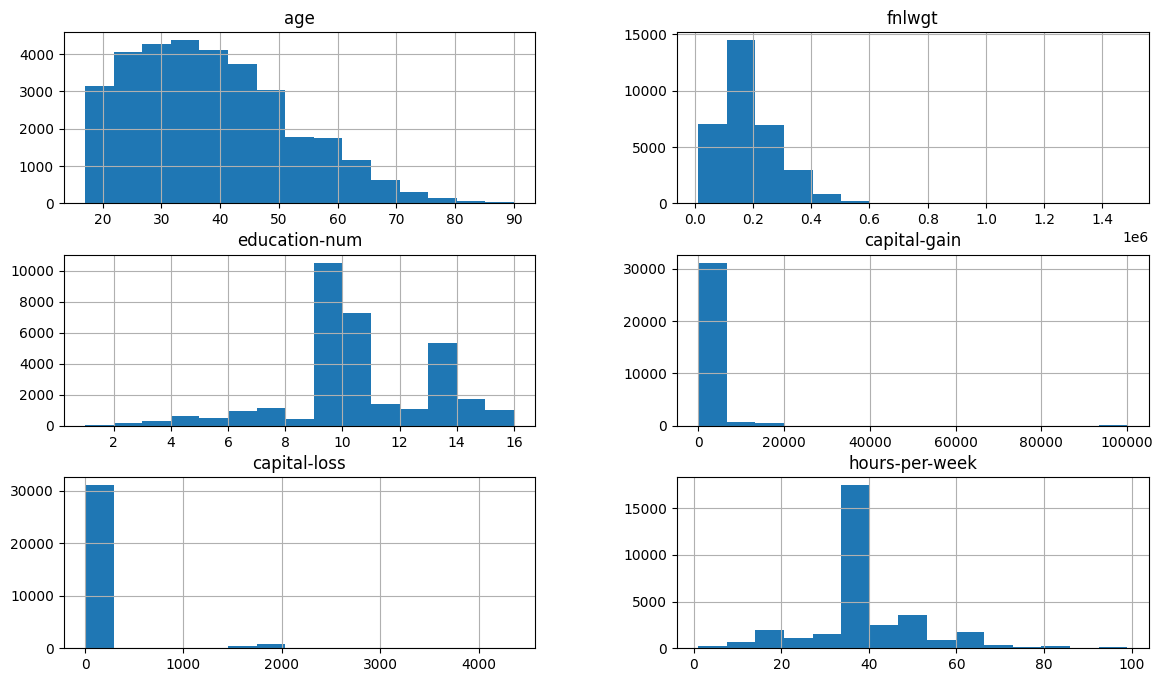

In [18]:
df.hist(bins = 15, figsize=(14, 8))
plt.show()

<Figure size 640x480 with 0 Axes>

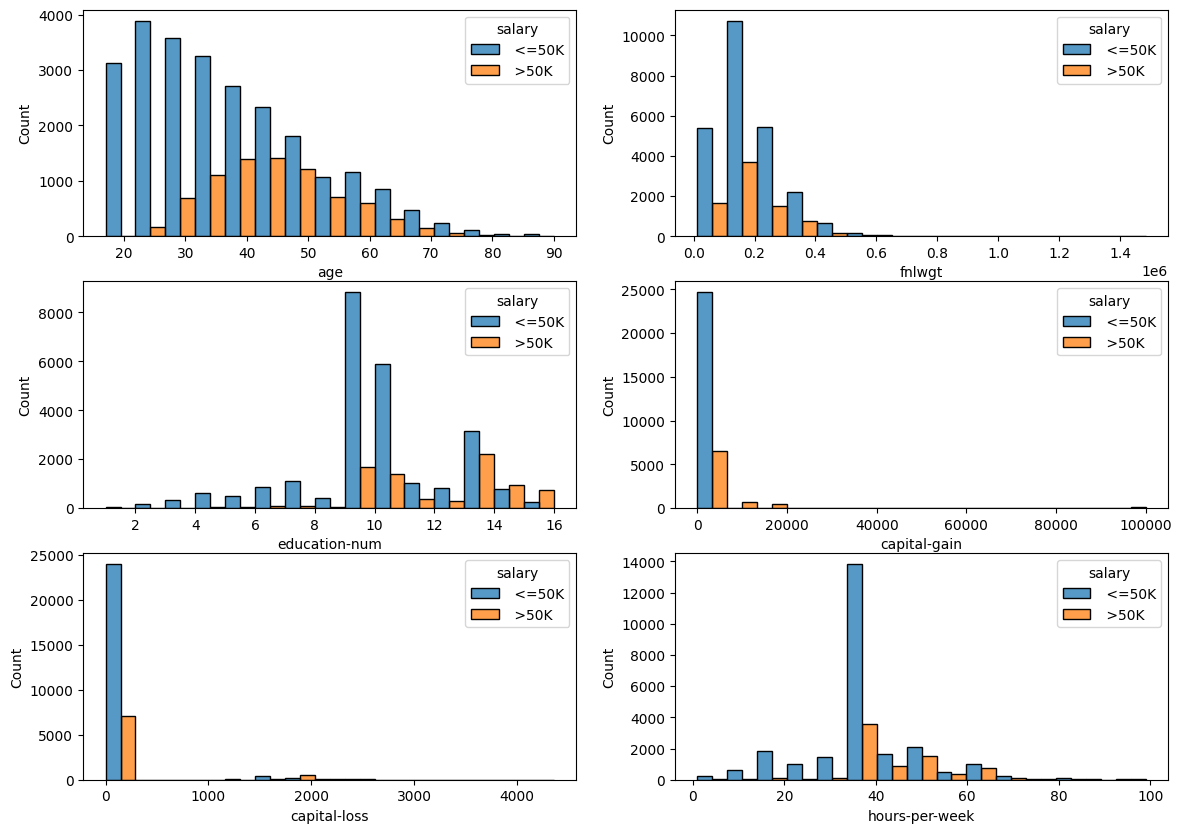

In [19]:
fig = plt.figure()
plt.figure(figsize=(14,10))
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1 
    sns.histplot(df, x=col, hue='salary', multiple='dodge', bins=15)
plt.show()

## Countplot

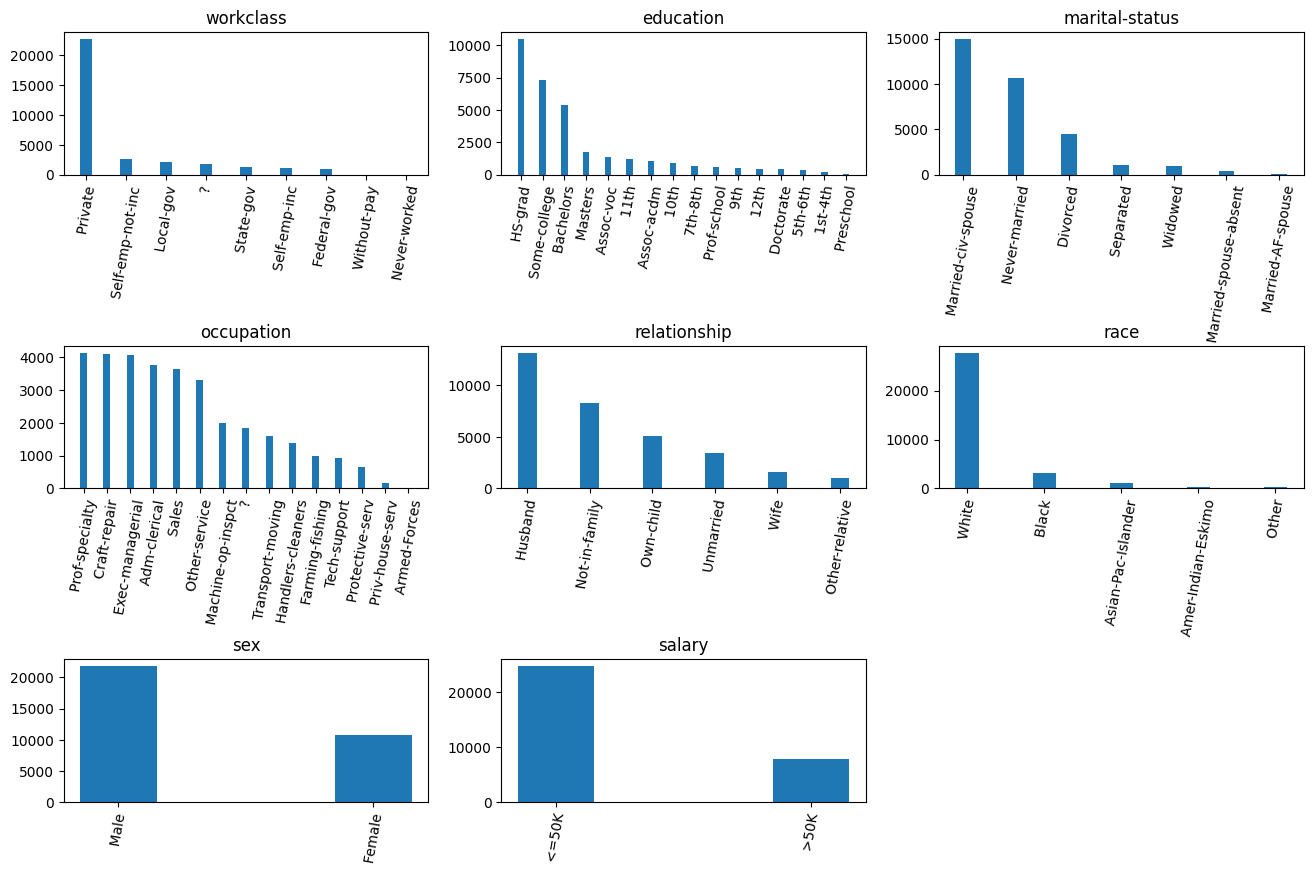

In [20]:
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(hspace=1.2)
i=1

for col in np.array(df.dtypes[df.dtypes!="int64"].index):
    if col=="native-country":
        continue
    ax = plt.subplot(3,3,i)
    i += 1
    count_tmp = df[col].value_counts()
    ax.bar(count_tmp.index, list(count_tmp), width = 0.3)
    plt.xticks(rotation=80)
    plt.title(col)
plt.show()
    

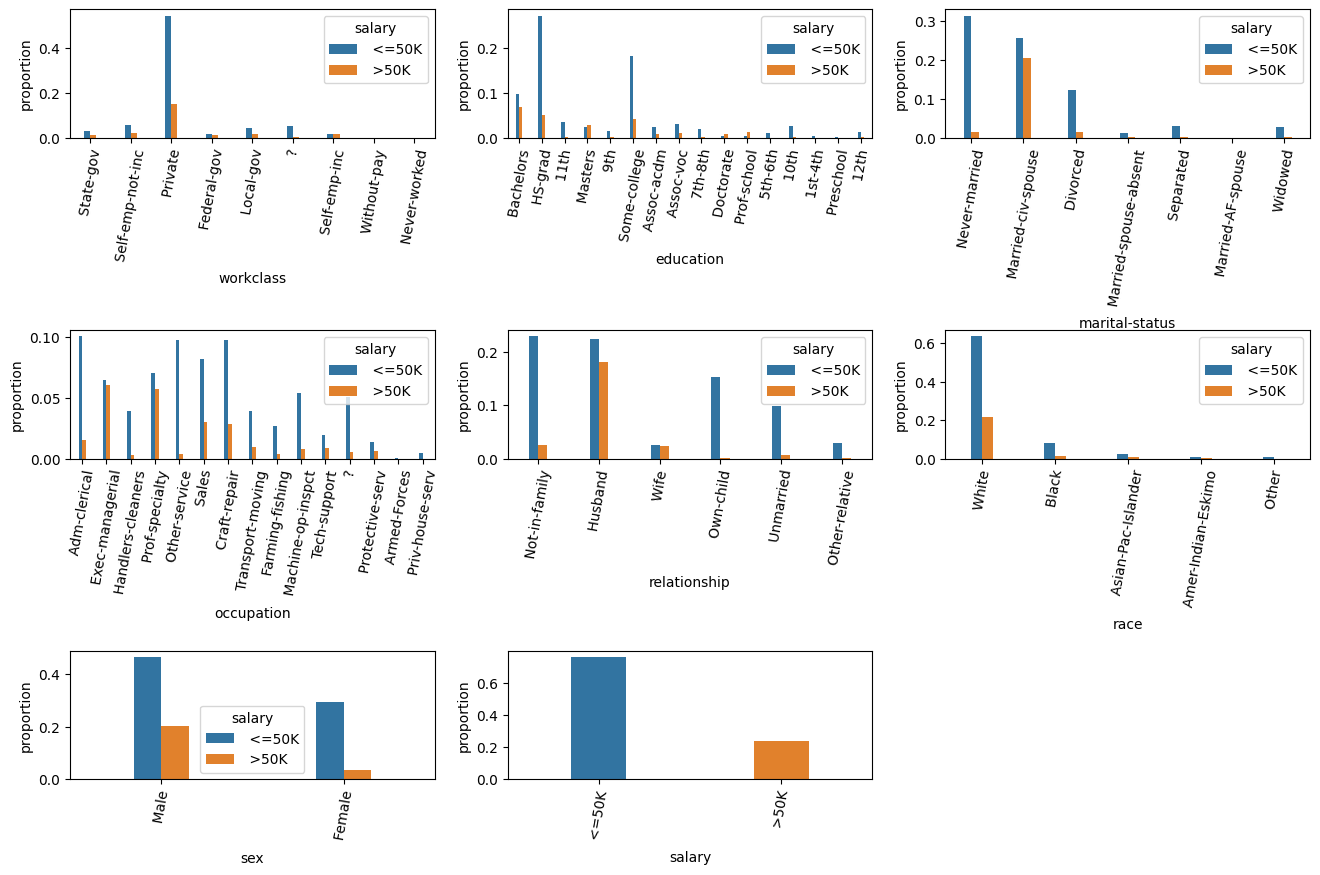

In [21]:
fig = plt.figure(figsize=(16,10))
plt.subplots_adjust(hspace=1.5)
i=1

for col in np.array(df.dtypes[df.dtypes!="int64"].index):
    if col=="native-country":
        continue
    ax = plt.subplot(3,3,i)
    i += 1
    count_tmp = df[col].value_counts()
    sns.countplot(df, x=col, hue="salary", width=0.3, stat='proportion')
    plt.xticks(rotation=80)
plt.show()

## Boxplot

<img src="https://miro.medium.com/max/700/1*2c21SkzJMf3frPXPAR_gZA.png" width="600">

<Figure size 640x480 with 0 Axes>

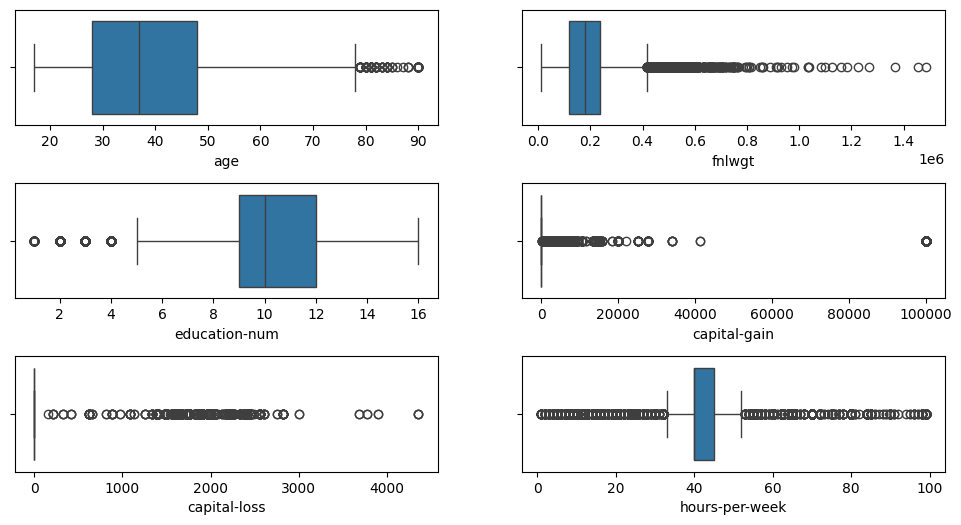

<Figure size 640x480 with 0 Axes>

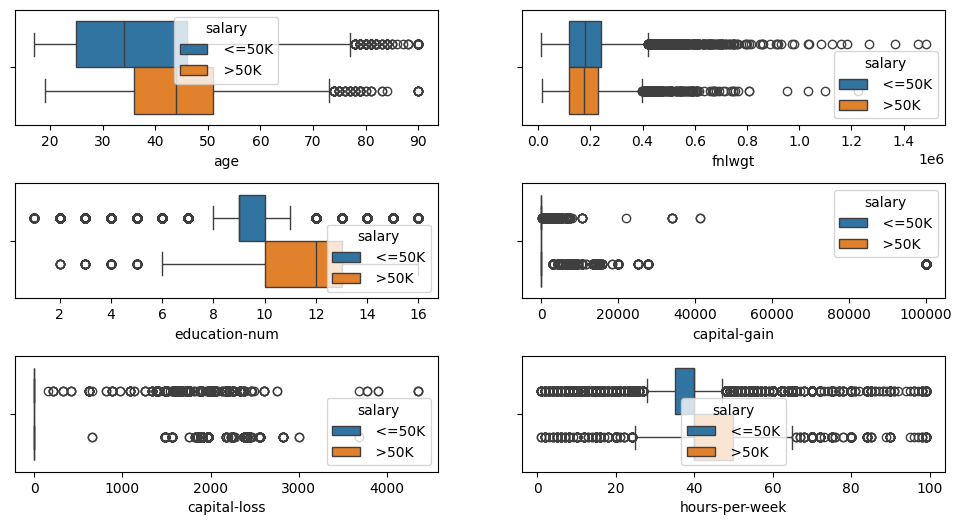

<Figure size 640x480 with 0 Axes>

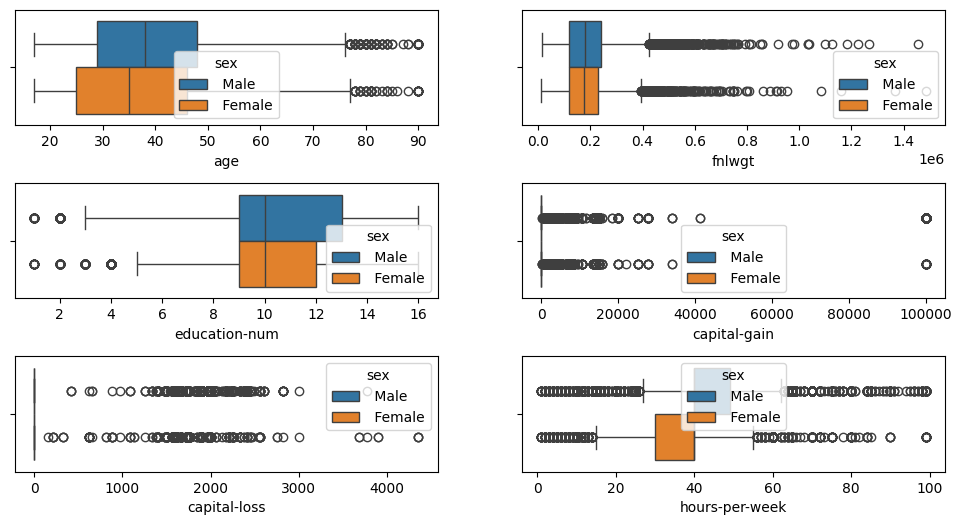

In [22]:
fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1 
    sns.boxplot(df, x=col)
plt.show()

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1 
    sns.boxplot(df, x=col, hue="salary")
plt.show()

fig = plt.figure()
plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.5)
i=1
for col in np.array(df.dtypes[df.dtypes=="int64"].index):
    ax_tmp = plt.subplot(3,2,i)
    i += 1 
    sns.boxplot(df, x=col, hue="sex")
plt.show()

## Korelacja

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/1024px-Correlation_examples2.svg.png" width="600">

/tmp/ipykernel_190900/957727585.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, ax=ax)


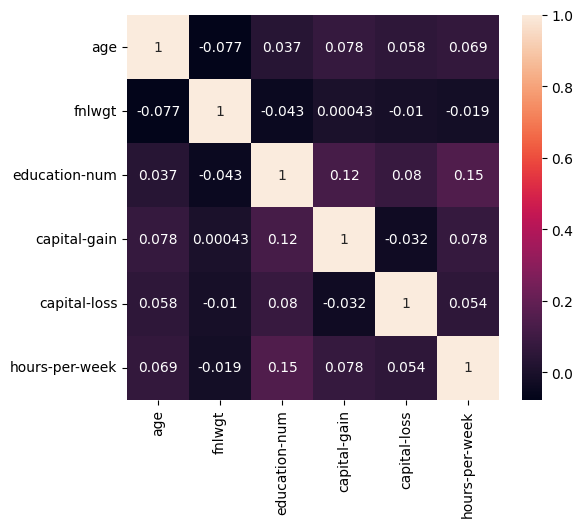

In [23]:
fig, ax = plt.subplots(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, ax=ax)
plt.show()

# Preprocessing danych na danych o butach

## Identyfikacja problemów

In [24]:
shoes_df = pd.read_csv('data/menshoes.csv')
shoes_df.head()

/tmp/ipykernel_190900/4171950119.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  shoes_df = pd.read_csv('data/menshoes.csv')


,id,asins,brand,categories,colors,count,dateadded,dateupdated,descriptions,dimension,...,prices_warranty,quantities,reviews,sizes,skus,sourceurls,upc,vin,websiteids,weight
0,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
1,AVpfHrJ6ilAPnD_xVXOI,NaN,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11,NaN,NaN,NaN
2,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
3,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN
4,AVpfHsWP1cnluZ0-eVZ7,NaN,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,...,NaN,NaN,NaN,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,NaN,NaN


In [25]:
shoes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   18280 non-null  object 
 1   asins                2161 non-null   object 
 2   brand                18263 non-null  object 
 3   categories           18280 non-null  object 
 4   colors               10344 non-null  object 
 5   count                0 non-null      float64
 6   dateadded            18280 non-null  object 
 7   dateupdated          18280 non-null  object 
 8   descriptions         9704 non-null   object 
 9   dimension            2968 non-null   object 
 10  ean                  9690 non-null   float64
 11  features             13299 non-null  object 
 12  flavors              0 non-null      float64
 13  imageurls            17255 non-null  object 
 14  isbn                 0 non-null      float64
 15  keys                 18280 non-null 

## Usuwanie kolumn z NaN

In [26]:
threshold = shoes_df.shape[0] * 0.7 # górna granica braku danych w kolumnie to 70%
shoes_df_drop = shoes_df.loc[:, shoes_df.apply(lambda x: x.isna().sum(), axis=0) < threshold]
shoes_df_drop.head(10)

,id,brand,categories,colors,dateadded,dateupdated,descriptions,ean,features,imageurls,...,prices_dateadded,prices_dateseen,prices_issale,prices_merchant,prices_offer,prices_sourceurls,sizes,skus,sourceurls,upc
0,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,True,NaN,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11
1,AVpfHrJ6ilAPnD_xVXOI,Josmo,"Clothing,Shoes,Men's Shoes,All Men's Shoes",NaN,2016-11-07T00:45:12Z,2016-11-07T00:45:12Z,"[{""dateSeen"":[""2016-11-07T00:45:12Z""],""sourceU...",6.993020e+11,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Shoe...",https://i5.walmartimages.com/asr/13ac3d61-003c...,...,2016-11-07T00:45:12Z,2016-11-05T00:00:00Z,False,UnbeatableSale - Walmart.com,REDUCED USD 12.10,https://www.walmart.com/ip/Josmo-8190-Plain-In...,NaN,NaN,https://www.walmart.com/ip/Josmo-8190-Plain-In...,6.993020e+11
2,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-03-08T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
3,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2015-11-30T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
4,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-04-29T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
5,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-07-09T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
6,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"":""Colo...",http://i5.walmartimages.com/dfw/dce07b8c-5844/...,...,2016-06-14T04:29:57Z,2016-03-10T00:00:00Z,False,SIM Supply Inc - Walmart.com,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN,NaN,http://www.walmart.com/ip/Studs-Shoe-Large-Pr-...,NaN
7,AVpfHsWP1cnluZ0-eVZ7,SERVUS BY HONEYWELL,"All Men's Shoes,Shoes,Men's Shoes,Clothing",NaN,2016-06-14T04:29:57Z,2016-07-09T20:26:48Z,"[{""dateSeen"":[""2016-07-09T20:26:48Z""],""sourceU...",NaN,"[{""key"":""Gender"",""value"":[""Men""]},{""key"

## Imputacja zmiennych kategorycznych

In [27]:
# popatrzmy na kolory butów
shoes_df_drop['colors'].value_counts()

Black                                                                                                              1364
Brown                                                                                                               746
Blue                                                                                                                421
Multicolor                                                                                                          415
White                                                                                                               252
                                                                                                                   ... 
Safety Green,Red,Black,Gold,Purple,Navy Blue,Royal Blue,Maroon,Oxford,Orange,Chocolate,Forest Green,Irish Green       1
WHTWHTMIDNIGHT NAVYMET SLVR                                                                                           1
WhiteBlack-Anthracite-Cool Grey         

In [28]:
pd.DataFrame(shoes_df_drop['colors']).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18280 entries, 0 to 18279
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   colors  10344 non-null  object
dtypes: object(1)
memory usage: 142.9+ KB


kolumna colors miała dużo nieuzupełnionych wartości  
jak można je uzupełnić?

In [29]:
# możnaby najczęściej występującym kolorem, ale czy to nie wprowadza fałszywej informacji?
# inne podejście - nowa klasa 'Other'
shoes_df_drop['colors'].fillna('Missing_color')  

0        Missing_color
1        Missing_color
2        Missing_color
3        Missing_color
4        Missing_color
             ...      
18275            Black
18276    Missing_color
18277    Missing_color
18278    Missing_color
18279    Missing_color
Name: colors, Length: 18280, dtype: object

## Imputacja zmiennych ciągłych

In [30]:
fake_data=pd.DataFrame({'num':np.random.choice([None, 3,4], 100), 
                        'cat': np.random.choice([None, 'Puma','Nike','Adidas'], 100, p=[0.92, 0.03, 0.03, 0.02])})
fake_data.head()

,num,cat
0,None,None
1,None,None
2,3,None
3,4,None
4,4,None


In [31]:
# średnia czy mediana? -> w sumei to zależy, ale obie opcje są git
fake_data["num"].fillna(fake_data["num"].median(), inplace=True)
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   num     100 non-null    float64
 1   cat     9 non-null      object 
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


## Outliery

### Zasada 3 sigma

Dane jedynie z przedziału (średnia +- 3 sigma) - zasadne podejście gdy rozkład normalny

In [32]:
data=pd.DataFrame({'num':np.random.normal(2,0.4,1000)})
factor = 3
upper_lim = data['num'].mean () + data['num'].std () * factor
lower_lim = data['num'].mean () - data['num'].std () * factor

data = data[(data['num'] < upper_lim) & (data['num'] > lower_lim)]
data.shape

(996, 1)

### Usuwanie na podstawie skrajnych percentyli

Wracamy na chwilę do danych o zarobkach

Zmienna `capital-gain`

In [33]:
# usuwanie na podstawie skrajnych percentyli
# zasadne dla praktycznie każdego rozkładu
gain_data = df['capital-gain']
print('Wejściowy rozmiar: ', gain_data.shape[0])

upper_lim = gain_data.quantile(.95)
lower_lim = gain_data.quantile(.05)

data_percentile = gain_data[(gain_data < upper_lim) & (gain_data > lower_lim)]
print('Wyjściowy rozmiar: ', data_percentile.shape[0])
print('Usunięto %: ', round(data_percentile.shape[0]/gain_data.shape[0], 2))

Wejściowy rozmiar:  32561
Wyjściowy rozmiar:  1064
Usunięto %:  0.03


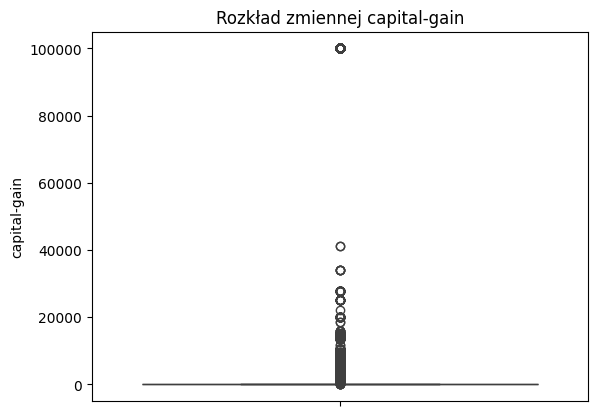

In [34]:
plot_box = sns.boxplot(df['capital-gain'])
plot_box.set_title('Rozkład zmiennej capital-gain')
plt.show()

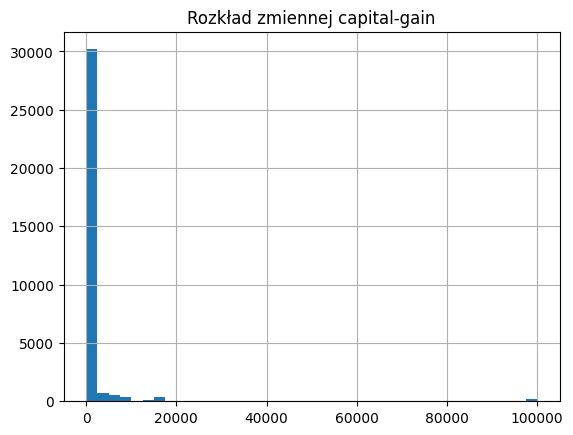

In [35]:
df["capital-gain"].hist(bins=40)
plt.title('Rozkład zmiennej capital-gain')
plt.show()

---

zmienna `fnlwgt`

In [36]:
# usuwanie na podstawie skrajnych percentyli
# zasadne dla każdego rozkładu

# w celu zaprezentowania tej metody posłużymy się zbiorem z poprzednich zajęć nt. domów w Bostonie
gain_data = df['fnlwgt']
print('Wejściowy rozmiar: ', gain_data.shape[0])

upper_lim = gain_data.quantile(.95)
lower_lim = gain_data.quantile(.05)

data_percentile = gain_data[(gain_data < upper_lim) & (gain_data > lower_lim)]
print('Wyjściowy rozmiar: ', data_percentile.shape[0])
print('Usunięto %: ', round(data_percentile.shape[0]/gain_data.shape[0], 2))

# Czy zastosowane podejście było dobre?
# @conclusion


Wejściowy rozmiar:  32561
Wyjściowy rozmiar:  29303
Usunięto %:  0.9


przed usunięciem

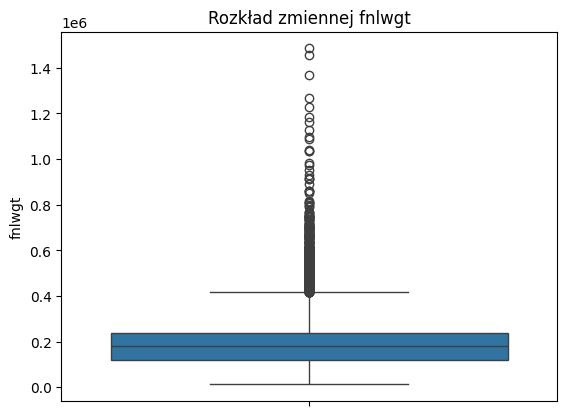

In [37]:
plot_box = sns.boxplot(df['fnlwgt'])
plot_box.set_title('Rozkład zmiennej fnlwgt')
plt.show()

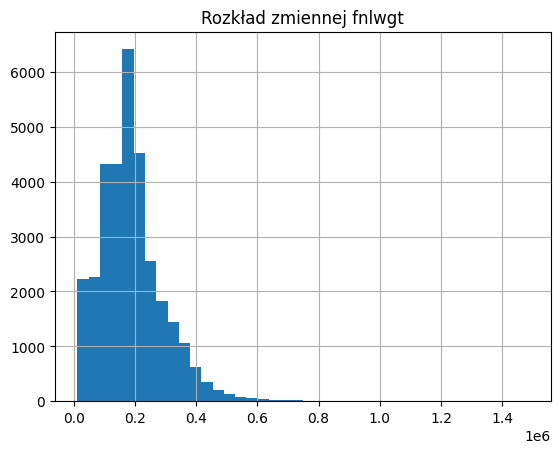

In [38]:
df["fnlwgt"].hist(bins=40)
plt.title('Rozkład zmiennej fnlwgt')
plt.show()

po usunięciu

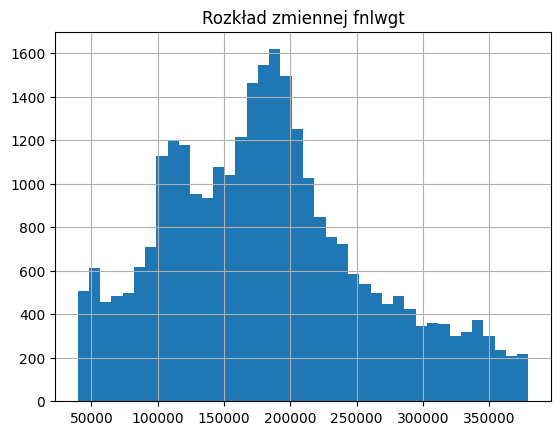

In [39]:
data_percentile.hist(bins=40)
plt.title('Rozkład zmiennej fnlwgt')
plt.show()

## Kodowanie zmiennych kategorycznych
- ordinal encoding
- one-hot encoding

### OneHotEncoding
Niektóre algorytmy mogą na wejście otrzymać tylko zmienne liczbowe dlatego zmienne kategoryczne trzeba w jakiś sposób zamienić na liczby. Najprostszą taką reprezentacją jest OneHotEncoding

![](https://i.imgur.com/mtimFxh.png)

Często też pozbywa się kolumny kodującą pierszwą wartość, ponieważ można i tak to wywnioskować gdy pozostałe kolumny są 0, dlatego ta dodatkowa kolumna nie wnosi żadnej informacji

### Ordinal encoding

![](https://datasciencedojo.com/wp-content/uploads/Categorical-data-encoding-ordinal-encoding.png)

## Scaling
- min-max scaling
- standaryzacja
- normalizacja
- ...

Niektóre algorytmy nie lubią dużych skal zmiennych.

In [ ]:
# min-max scaling
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
mm_scaler = MinMaxScaler()

print(mm_scaler.fit_transform(data))


[[0.        ]
 [0.15789474]
 [0.02631579]
 [0.36842105]
 [0.05263158]
 [0.57894737]
 [0.10526316]
 [1.        ]]


In [ ]:
# standarization
data = np.array([-1, 2, -0.5, 6, 0, 10, 1, 18]).reshape(-1, 1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
print(scaled_data)
print("\n")
print(np.round(np.mean(scaled_data), 4), np.std(scaled_data))

[[-0.87531175]
 [-0.39238113]
 [-0.79482332]
 [ 0.25152637]
 [-0.71433488]
 [ 0.89543386]
 [-0.553358  ]
 [ 2.18324886]]


-0.0 1.0


##  Grouping & Binning
Agregujemy klasy do wyższego poziomu lub tniemy zmienną ciągłą na klasy

Czasami potrzebujemy zrobić ze zmiennej ciągłej kategoryczną albo mamy zmienną kategoryczną o bardzo dużej liczbie klas albo dużo klas mało licznych.

# Wprowadzenie do Algebry Liniowej

**Algebra liniowa** to dziedzina matematyki zajmująca się badaniem przestrzeni liniowych oraz operacji na wektorach i macierzach. W uczeniu maszynowym algebra liniowa jest kluczowa, ponieważ większość operacji na danych i modelach można wyrazić jako operacje na wektorach i macierzach. Na przykład dane w formie tabeli możemy traktować jako macierz, a parametry modelu jako wektory/macierze.

## Wektory

**Wektor** to uporządkowany zbiór liczb, które reprezentują punkt w przestrzeni. Wektory możemy traktować jako listy liczb, które możemy wykorzystywać do opisywania różnych cech lub wartości.

**Notacja:**
Wektor oznaczamy jako kolumnę liczb, np.:
$$ \mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} $$
gdzie $ v_1, v_2, \ldots, v_n $ to elementy wektora.

**Przykład wektora 3-wymiarowego:**
Weźmy wektor:
$$ \mathbf{v} = \begin{bmatrix} 2 \\ 3 \\ -1 \end{bmatrix} $$
Ten wektor można traktować jako punkt w 3-wymiarowej przestrzeni, opisujący położenie w osi $ x = 2 $, $ y = 3 $, $ z = -1 $.

## Macierze

**Macierz** to tablica liczb, która składa się z wierszy i kolumn. Każdy element macierzy jest oznaczany jako $ a_{ij} $, gdzie $ i $ oznacza numer wiersza, a $ j $ numer kolumny.

**Notacja:**
Macierz $ \mathbf{A} $ o wymiarach $ m \times n $ można zapisać jako:
$$
\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \dots & a_{mn} \end{bmatrix}
$$

**Przykład macierzy 2x3:**
$$
\mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix}
$$

W uczeniu maszynowym macierze często reprezentują zestawy danych – każdy wiersz może być jednym przykładem (rekordem), a każda kolumna cechą.

## Operacje na macierzach

### Mnożenie macierzy przez skalar

Załóżmy, że mamy skalar $ k $ oraz macierz $ \mathbf{A} $ o wymiarach $ m \times n $:
$$
\mathbf{A} = \begin{bmatrix} a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \dots & a_{mn} \end{bmatrix}
$$

Aby pomnożyć macierz $ \mathbf{A} $ przez skalar $ k $, mnożymy każdy element $ a_{ij} $ przez $ k $:
$$
k \cdot \mathbf{A} = \begin{bmatrix} k \cdot a_{11} & k \cdot a_{12} & \dots & k \cdot a_{1n} \\ k \cdot a_{21} & k \cdot a_{22} & \dots & k \cdot a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ k \cdot a_{m1} & k \cdot a_{m2} & \dots & k \cdot a_{mn} \end{bmatrix}
$$

**Przykład**

Rozważmy skalar $ k = 3 $ oraz macierz:
$$
\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}
$$

Aby pomnożyć macierz $ \mathbf{A} $ przez skalar $ 3 $, wykonujemy następujące operacje:

$$
3 \cdot \mathbf{A} = 3 \cdot \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} = \begin{bmatrix} 3 \cdot 1 & 3 \cdot 2 \\ 3 \cdot 3 & 3 \cdot 4 \end{bmatrix} = \begin{bmatrix} 3 & 6 \\ 9 & 12 \end{bmatrix}
$$

---

### Dodawanie macierzy

Dwie macierze o tych samych wymiarach można dodawać, dodając elementy znajdujące się na tych samych pozycjach. Jeśli macierze mają różne wymiary, operacja dodawania nie jest możliwa.

**Przykład dodawania macierzy:**
Jeśli mamy macierze:
$$ \mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix}, \quad \mathbf{B} = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} $$
to ich suma wynosi:
$$ \mathbf{A} + \mathbf{B} = \begin{bmatrix} 1+5 & 2+6 \\ 3+7 & 4+8 \end{bmatrix} = \begin{bmatrix} 6 & 8 \\ 10 & 12 \end{bmatrix} $$

---

### Mnożenie macierzy

Załóżmy, że mamy dwie macierze:
1. Macierz $ \mathbf{A} $ o wymiarach $ m \times n $, czyli $ m $ wierszy i $ n $ kolumn.
2. Macierz $ \mathbf{B} $ o wymiarach $ n \times p $, czyli $ n $ wierszy i $ p $ kolumn.

Ważne jest, aby liczba kolumn w pierwszej macierzy (tu: $ \mathbf{A} $) była równa liczbie wierszy w drugiej macierzy (tu: $ \mathbf{B} $). W przeciwnym wypadku mnożenie nie będzie możliwe. Wynikiem mnożenia macierzy $ \mathbf{A} $ i $ \mathbf{B} $ jest nowa macierz $ \mathbf{C} $ o wymiarach $ m \times p $.

#### Jak obliczyć elementy macierzy wynikowej?

Każdy element $ c_{ij} $ w macierzy wynikowej $ \mathbf{C} $ jest obliczany jako iloczyn skalarów wiersza $ i $-tego z macierzy $ \mathbf{A} $ oraz kolumny $ j $-tej z macierzy $ \mathbf{B} $.

Formalnie:
$$
c_{ij} = \sum_{k=1}^{n} a_{ik} \cdot b_{kj}
$$
gdzie:
- $ a_{ik} $ oznacza element w $ i $-tym wierszu i $ k $-tej kolumnie macierzy $ \mathbf{A} $,
- $ b_{kj} $ oznacza element w $ k $-tym wierszu i $ j $-tej kolumnie macierzy $ \mathbf{B} $,
- $ c_{ij} $ to element w $ i $-tym wierszu i $ j $-tej kolumnie macierzy wynikowej $ \mathbf{C} $.

#### Przykład mnożenia macierzy

Weźmy konkretne macierze, aby zobaczyć, jak wygląda ten proces:

Załóżmy, że mamy:
$$
\mathbf{A} = \begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} \quad \text{(macierz 2x2)}
$$
$$
\mathbf{B} = \begin{bmatrix} 5 & 6 \\ 7 & 8 \end{bmatrix} \quad \text{(macierz 2x2)}
$$

Chcemy pomnożyć $ \mathbf{A} $ przez $ \mathbf{B} $ i uzyskać macierz $ \mathbf{C} = \mathbf{A} \cdot \mathbf{B} $.

**Krok 1**: Oblicz element $ c_{11} $
- Bierzemy pierwszy wiersz z $ \mathbf{A} $: $ [1, 2] $
- Bierzemy pierwszą kolumnę z $ \mathbf{B} $: $ \begin{bmatrix} 5 \\ 7 \end{bmatrix} $
- Obliczamy iloczyn skalarów: $ 1 \cdot 5 + 2 \cdot 7 = 5 + 14 = 19 $
- Wstawiamy wynik na pozycję $ c_{11} $ w macierzy $ \mathbf{C} $.

**Krok 2**: Oblicz element $ c_{12} $
- Bierzemy pierwszy wiersz z $ \mathbf{A} $: $ [1, 2] $
- Bierzemy drugą kolumnę z $ \mathbf{B} $: $ \begin{bmatrix} 6 \\ 8 \end{bmatrix} $
- Obliczamy iloczyn skalarów: $ 1 \cdot 6 + 2 \cdot 8 = 6 + 16 = 22 $
- Wstawiamy wynik na pozycję $ c_{12} $ w macierzy $ \mathbf{C} $.

Korok 3 oraz 4 przebiegaja w analogiczny sposób.

Po wykonaniu wszystkich kroków macierz wynikowa $ \mathbf{C} $ wygląda następująco:
$$
\mathbf{C} = \begin{bmatrix} 19 & 22 \\ 43 & 50 \end{bmatrix}
$$

---

### Transpozycja macierzy

Transpozycja macierzy polega kolokwialnie mówiąc na zamianie wierszy na kolumny. Transponowaną macierz oznaczamy symbolem $ \mathbf{A}^T $.

**Przykład transpozycji macierzy:**
Jeśli mamy macierz:
$$ \mathbf{A} = \begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \end{bmatrix} $$
to jej transpozycja to:
$$ \mathbf{A}^T = \begin{bmatrix} 1 & 4 \\ 2 & 5 \\ 3 & 6 \end{bmatrix} $$

## Norma wektora

**Norma** wektora to liczba opisująca jego długość. Najczęściej używana norma to **norma euklidesowa**, która jest po prostu odległością punktu (wektora) od początku układu współrzędnych.

**Wzór na normę euklidesową:**
Dla wektora $ \mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \vdots \\ v_n \end{bmatrix} $, norma euklidesowa jest obliczana jako:
$$ ||\mathbf{v}||_{2} = \sqrt{v_1^2 + v_2^2 + \dots + v_n^2} $$

**Przykład:**
Dla wektora $ \mathbf{w} = \begin{bmatrix} 3 \\ 4 \end{bmatrix} $, norma euklidesowa wynosi:
$$ ||\mathbf{w}||_{2} = \sqrt{3^2 + 4^2} = 5 $$

## Macierz jednostkowa

**Macierz jednostkowa**, oznaczana zwykle przez $ \mathbf{I} $, to kwadratowa macierz, w której wszystkie elementy na głównej przekątnej są równe 1, a pozostałe elementy są równe 0. Macierz jednostkowa pełni podobną rolę jak liczba 1 w arytmetyce – jest elementem neutralnym mnożenia macierzowego.

**Notacja:**
Dla macierzy jednostkowej $ n \times n $ mamy:
$$
\mathbf{I}_n = \begin{bmatrix} 1 & 0 & \dots & 0 \\ 0 & 1 & \dots & 0 \\ \vdots & \vdots & \ddots & \vdots \\ 0 & 0 & \dots & 1 \end{bmatrix}
$$

**Przykład macierzy jednostkowej $ 3 \times 3 $:**
$$
\mathbf{I}_3 = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}
$$

**Właściwości:**
Macierz jednostkowa spełnia następujące właściwości dla dowolnej macierzy kwadratowej $ \mathbf{A} $ tzn. o wymiarach $ n \times n $:
$$
\mathbf{A} \cdot \mathbf{I} = \mathbf{I} \cdot \mathbf{A} = \mathbf{A}
$$
Oznacza to, że mnożenie macierzy przez macierz jednostkową nie zmienia jej wartości.

## Macierz odwrotna

**Macierz odwrotna** do macierzy kwadratowej $ \mathbf{A} $, oznaczana jako $ \mathbf{A}^{-1} $, to macierz, która spełnia warunek:
$$
\mathbf{A} \cdot \mathbf{A}^{-1} = \mathbf{A}^{-1} \cdot \mathbf{A} = \mathbf{I}
$$
gdzie $ \mathbf{I} $ jest macierzą jednostkową. Tylko macierze kwadratowe, które są odwracalne (mają wyznacznik różny od zera), mogą mieć macierz odwrotną. Z tego wynika, że nie każda macierz kwadratowa ma macierz do siebie odwrotną.

**Właściwości macierzy odwrotnej:**
1. Tylko macierze kwadratowe o niezerowym wyznaczniku ($\text{det}(A)\neq 0$) mają macierz odwrotną.
2. Jeśli $ \mathbf{A}^{-1} $ istnieje, to:
   $$
   \mathbf{A} \cdot \mathbf{A}^{-1} = \mathbf{I}
   $$

## Standardowy iloczyn skalarny

**Standardowy iloczyn skalarny** to operacja na dwóch wektorach o tej samej liczbie wymiarów, której wynik jest liczbą (skalarem). Iloczyn skalarny wektorów $ \mathbf{u} = \begin{bmatrix} u_1 \\ u_2 \\ \dots \\ u_n \end{bmatrix} $ oraz $ \mathbf{v} = \begin{bmatrix} v_1 \\ v_2 \\ \dots \\ v_n \end{bmatrix} $ jest zdefiniowany jako:
$$
\mathbf{u} \cdot \mathbf{v} = u_1 v_1 + u_2 v_2 + \dots + u_n v_n = \sum_{i=1}^{n} u_i v_i
$$
Iloczyn skalarny wyraża miarę podobieństwa kierunku między wektorami, a jego wynik może być dodatni, ujemny lub równy zero.

**Przykład:**
Rozważmy wektory:
$$
\mathbf{u} = \begin{bmatrix} 1 \\ 3 \end{bmatrix}, \quad \mathbf{v} = \begin{bmatrix} 4 \\ 2 \end{bmatrix}
$$
Iloczyn skalarny $ \mathbf{u} \cdot \mathbf{v} $ wynosi:
$$
\mathbf{u} \cdot \mathbf{v} = (1 \cdot 4) + (3 \cdot 2) = 4 + 6 = 10
$$

**Właściwości iloczynu skalarnego:**
1. Iloczyn skalarny jest przemienny: $ \mathbf{u} \cdot \mathbf{v} = \mathbf{v} \cdot \mathbf{u} $.
2. Iloczyn skalarny dwóch ortogonalnych (prostopadłych) wektorów wynosi zero.

**Interpretacja geometryczna:**
Iloczyn skalarny dwóch wektorów $ \mathbf{u} $ i $ \mathbf{v} $ można również wyrazić jako:
$$
\mathbf{u} \cdot \mathbf{v} = ||\mathbf{u}|| \, ||\mathbf{v}|| \cos \theta
$$
gdzie $ ||\mathbf{u}|| $ i $ ||\mathbf{v}|| $ to normy (długości) wektorów, a $ \theta $ to kąt między wektorami. Dzięki temu możemy mierzyć, jak bardzo wektory są skierowane w tę samą stronę:
- Jeśli $ \theta = 0^\circ $, iloczyn skalarny osiąga wartość maksymalną.
- Jeśli $ \theta = 90^\circ $, iloczyn skalarny wynosi zero, co oznacza, że wektory są prostopadłe.
- Jeśli $ \theta = 180^\circ $, iloczyn skalarny jest ujemny, co oznacza, że wektory mają przeciwny kierunek.